In [16]:
from numpy import array, linspace, sqrt, zeros, zeros_like, matrix, block, conjugate, argmax, pi, transpose
from numpy.linalg import eig
from control import ss, ss2tf, pole, zero
from control.matlab import acker, lsim
import matplotlib.pyplot as plt

In [2]:
C1 = 1000e-6
C2 = C1
L = 20e-3
R1 = 5
R2 = R1
tf = 100e-3

A = matrix([[-R1/C1, 0, 1/C1], [0, -1/(R2*C2), -1/C2], [-1/L, 1/L, 0]])
B = matrix([[0], [1], [0]])
C = matrix([1, 0, 0])
D = matrix([0])

G = ss(A, B, C, D)
G

<LinearIOSystem:sys[2]:['u[0]']->['y[0]']>

In [4]:
p = pole(G)
z = zero(G)
print(f'Polos = {p} | Zeros = {z}')

Polos = [-4990.0008785   +0.j          -104.99956075+202.68026911j
  -104.99956075-202.68026911j] | Zeros = []


In [13]:
u1 = 4*p[0]
u2 = 4*p[1]
u3 = 4*p[2]

K = acker(transpose(A), transpose(C), [u1, u2, u3])
Ke = transpose(K)
print(Ke)

matrix([[ 15600.],
        [258480.],
        [ 13380.]])

In [35]:
Mo = block([transpose(C), transpose(A)*transpose(C), transpose(A)**2*transpose(C)]) # errado, não lembro T_T
Mo
auVa, _ = eig(Mo)
print(auVa)

[ 1.00000e+00  9.99998e+00 -5.00001e+06]


In [28]:
wd = u2.imag
wa = 30*wd
T = 2*pi/wa

print(f'T = {T*1e6} us')

T = 258.33732010447335 us


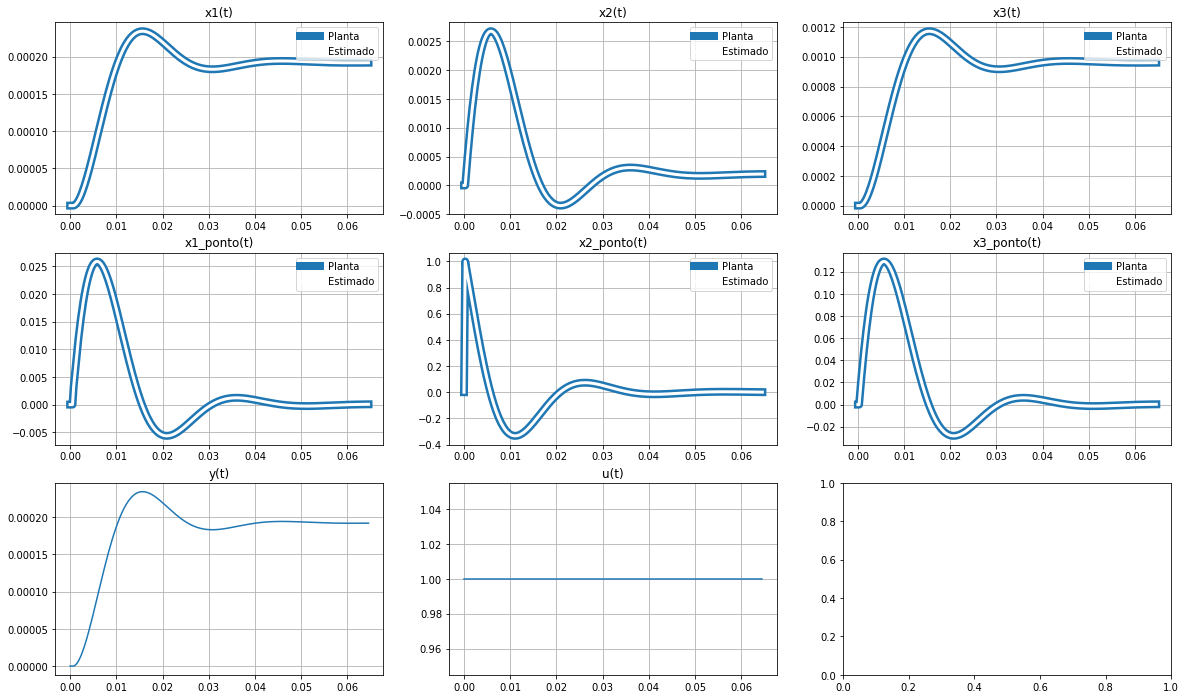

In [30]:
Kmax = 250
k = linspace(0, Kmax, Kmax+1)

x = matrix([zeros_like(k), zeros_like(k), zeros_like(k)])
x_p = zeros_like(x)

x_obs = zeros_like(x)
x_obs_p = zeros_like(x)

u = [1.0]*len(k)
y = zeros_like(k)

for i in range(1, len(k)):
    x[:, i] = T*x_p[:, i-1] + x[:, i-1]
    x_obs[:, i] = T*x_obs_p[:, i-1] + x_obs[:, i-1]
    
    y[i] = C*x[:, i] + D*u[i]
    
    x_p[:, i] = A*x[:, i] + B*u[i]
    x_obs_p[:, i] =  A*x_obs[:, i] + B*u[i] + Ke*(y[i]-C*x_obs[:, i])
    
    
f, ([X1, X2, X3], [X1_p, X2_p, X3_p], [Y, U, Z]) = plt.subplots(3, 3, figsize=[20, 12])

X1.plot(T*k, transpose(x[0,:]), linewidth=8, label='Planta')
X1.plot(T*k, transpose(x_obs[0,:]), 'w', linewidth=3, label='Estimado')
X1.set_title('x1(t)')
X1.legend()
X1.grid()

X2.plot(T*k, transpose(x[1, :]), linewidth=8, label='Planta')
X2.plot(T*k, transpose(x_obs[1,:]), 'w', linewidth=3, label='Estimado')
X2.set_title('x2(t)')
X2.legend()
X2.grid()

X3.plot(T*k, transpose(x[2, :]), linewidth=8, label='Planta')
X3.plot(T*k, transpose(x_obs[2,:]), 'w', linewidth=3, label='Estimado')
X3.set_title('x3(t)')
X3.legend()
X3.grid()

X1_p.plot(T*k, transpose(x_p[0,:]), linewidth=8, label='Planta')
X1_p.plot(T*k, transpose(x_obs_p[0,:]), 'w', linewidth=3, label='Estimado')
X1_p.set_title('x1_ponto(t)')
X1_p.legend()
X1_p.grid()

X2_p.plot(T*k, transpose(x_p[1, :]), linewidth=8, label='Planta')
X2_p.plot(T*k, transpose(x_obs_p[1,:]), 'w', linewidth=3, label='Estimado')
X2_p.set_title('x2_ponto(t)')
X2_p.legend()
X2_p.grid()

X3_p.plot(T*k, transpose(x_p[2, :]), linewidth=8, label='Planta')
X3_p.plot(T*k, transpose(x_obs_p[2,:]), 'w', linewidth=3, label='Estimado')
X3_p.set_title('x3_ponto(t)')
X3_p.legend()
X3_p.grid()

Y.plot(T*k, y)
Y.set_title('y(t)')
Y.grid()

U.plot(T*k, u)
U.set_title('u(t)')
U.grid()